<a href="https://colab.research.google.com/github/SVGS-EVA4/Phase2/blob/master/S6-Generative_Adversarial_Networks/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import numpy as np
import shutil

In [ ]:
shutil.copytree('/content/drive/My Drive/E4P2/cars_dataset', 'data/cars_dataset')

'cars_dataset'

In [ ]:
data_path = 'data/cars_dataset'

In [ ]:
for folder in os.listdir(data_path):
  print(folder, len(os.listdir(data_path+'/'+folder)))

Garima 125
Shilpa 125
Sushmitha 125
car_dataset 148


In [ ]:
# list images that do not have 3 channels
folders = os.listdir(data_path)

for folder in folders:
  folder_path = os.path.join(data_path,folder)
  print(folder)
  for File in os.listdir(folder_path):
    file_path = os.path.join(folder_path,File)
    img_arr = np.asarray(Image.open(file_path))
    if len(img_arr.shape)<3 or img_arr.shape[-1]!=3:
      print(File,img_arr.shape) 

Garima
25.jpg (375, 500, 4)
5.jpg (252, 370)
74.jpg (1050, 1882, 4)
19.jpg (430, 700, 4)
8.jpg (260, 500, 4)
22.jpg (432, 700, 4)
29.jpg (297, 468, 4)
30.jpg (276, 500, 4)
46.jpg (398, 920)
27.jpg (322, 500, 4)
Shilpa
Sushmitha
car_dataset
car-2.jpeg (168, 299, 4)
car-60.png (171, 294)
car-80.png (159, 318)
car-69.png (153, 329)


In [ ]:
# get images width and height to perform some statistics
img_width = []
img_height = []

folders = os.listdir(data_path)

for folder in folders:
  folder_path = os.path.join(data_path,folder)
  print(folder)
  for File in os.listdir(folder_path):
    file_path = os.path.join(folder_path,File)
    img_shape = np.asarray(Image.open(file_path)).shape
    img_height.append(img_shape[0])
    img_width.append(img_shape[1])

Garima
Shilpa
Sushmitha
car_dataset


In [ ]:
print('Height: min',min(img_height),'max',max(img_height))
print('Width: min',min(img_width),'max',max(img_width))

Height: min 70 max 1536
Width: min 144 max 2048


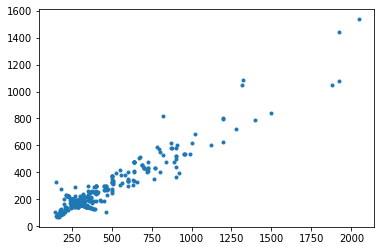

In [ ]:
import matplotlib.pyplot as plt
plt.plot(img_width,img_height,'.')

(0.0, 400.0)

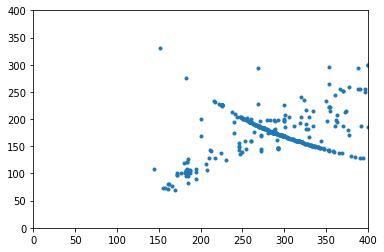

In [ ]:
plt.plot(img_width,img_height,'.')
plt.xlim(0, 400)
plt.ylim(0, 400)

In [ ]:
os.mkdir('cars_dataset')

Padding the images with white

In [ ]:
def toSquare_img(img):
    # img = Image.open(img_path)
  
    h,w = img.size[0],img.size[1]
    max_len = max(h,w)
    if h == w:
        return img
        
    elif h>w:
        diff = int(abs(h-w)/2)
        white = 255 * np.ones((max_len,max_len,3), np.uint8)
        white_img = Image.fromarray(white,mode='RGB')

        white_img.paste(img,(0,diff))
        return white_img
    elif w>h:
        diff = int(abs(h-w)/2)
        white = 255 * np.ones((max_len,max_len,3), np.uint8)
        white_img = Image.fromarray(white,mode='RGB')

        white_img.paste(img,(diff,0))

        return white_img

In [ ]:
folders = os.listdir(data_path)
num=1
dataset_path = '/content/cars_dataset'
for folder in folders:
  folder_path = os.path.join(data_path,folder)
  print(folder)
  for File in os.listdir(folder_path):
    file_path = os.path.join(folder_path,File)
    img = Image.open(file_path)
    img_arr = np.asarray(img)
    save_path = f'{dataset_path}/car_{num}.jpg'
    
    if len(img_arr.shape)<3 or img_arr.shape[-1]!=3:
      img = img.convert('RGB')
      sqimg = toSquare_img(img)
      sqimg.save(save_path)
    else:
      sqimg = toSquare_img(img)
      sqimg.save(save_path)
    num+=1

Garima
Shilpa
Sushmitha
car_dataset


In [ ]:
dataset_path = '/content/cars_dataset'
files = os.listdir(dataset_path)
print('No. of files', len(files))

No. of files 523


(500, 375)


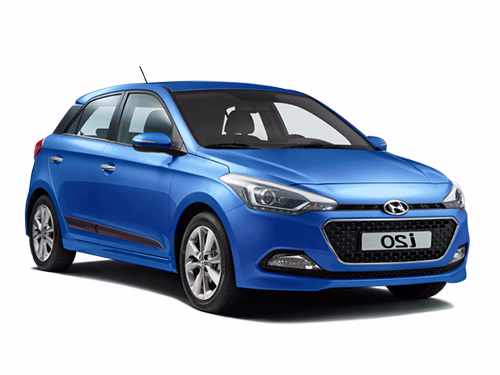

In [ ]:
files = os.listdir('/content/data/cars_dataset/Garima')[:1]
car = Image.open('/content/data/cars_dataset/Garima/'+files[0])
print(car.size)
car

(500, 500)


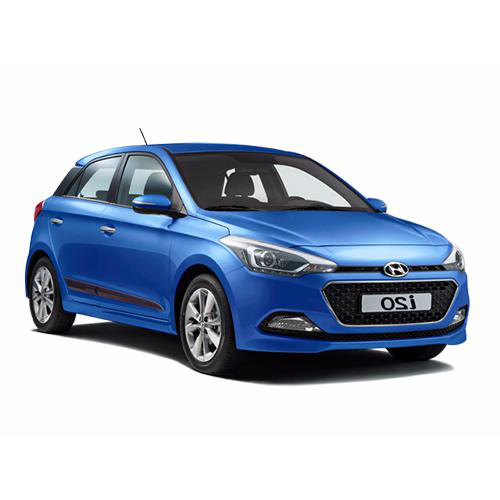

In [ ]:
sqcar = Image.open('/content/cars_dataset/car_1.jpg')
print(sqcar.size)
sqcar

In [ ]:
from zipfile import ZipFile 

count = len(os.listdir('cars_dataset'))
with ZipFile('/content/drive/My Drive/E4P2/cars_dataset/cars_dataset.zip','a', compression = zipfile.ZIP_DEFLATED) as zip: 
  for num in range(1,count+1): 
    zip.write(f'cars_dataset/car_{num}.jpg') 
print('Zipped all files ')

Zipped all files 


In [ ]:
with ZipFile('/content/drive/My Drive/E4P2/cars_dataset/cars_dataset.zip', 'r') as zip_file: 
      zip_file.extractall('dataset') 
      print('Done!')

Done!


In [ ]:
len(os.listdir('/content/dataset/cars_dataset'))

523